# K Nearest Neighbors Project (Universities classification - Private vs Public)

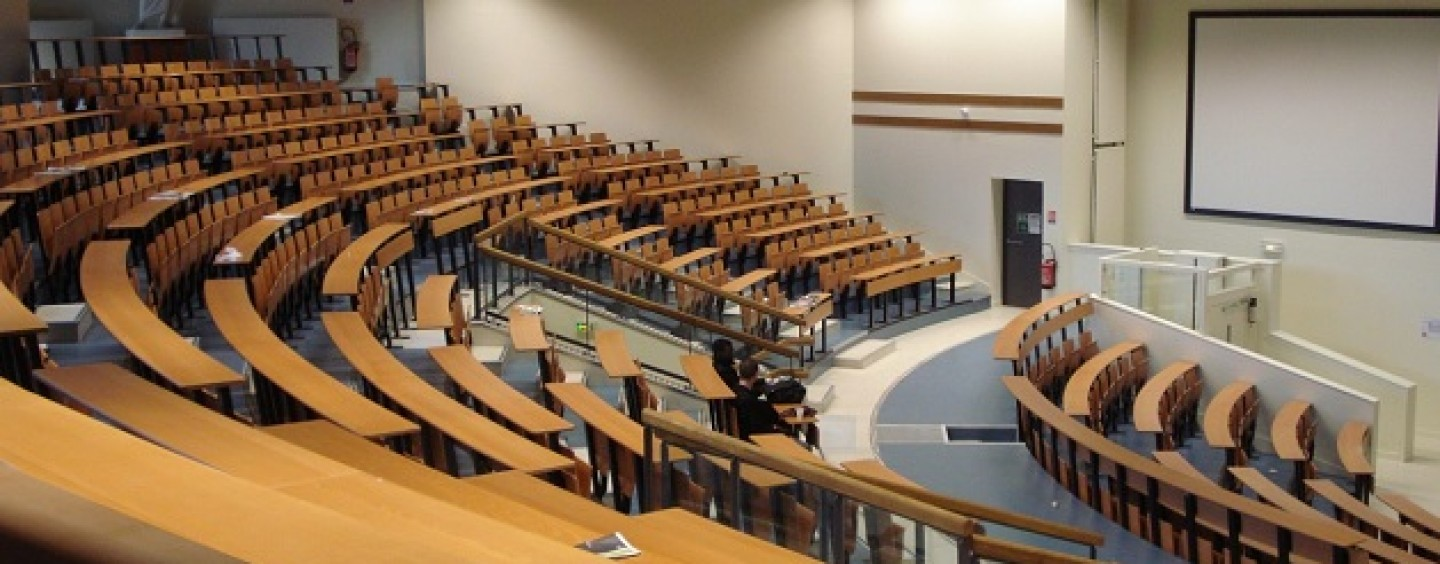

Classification and Regression

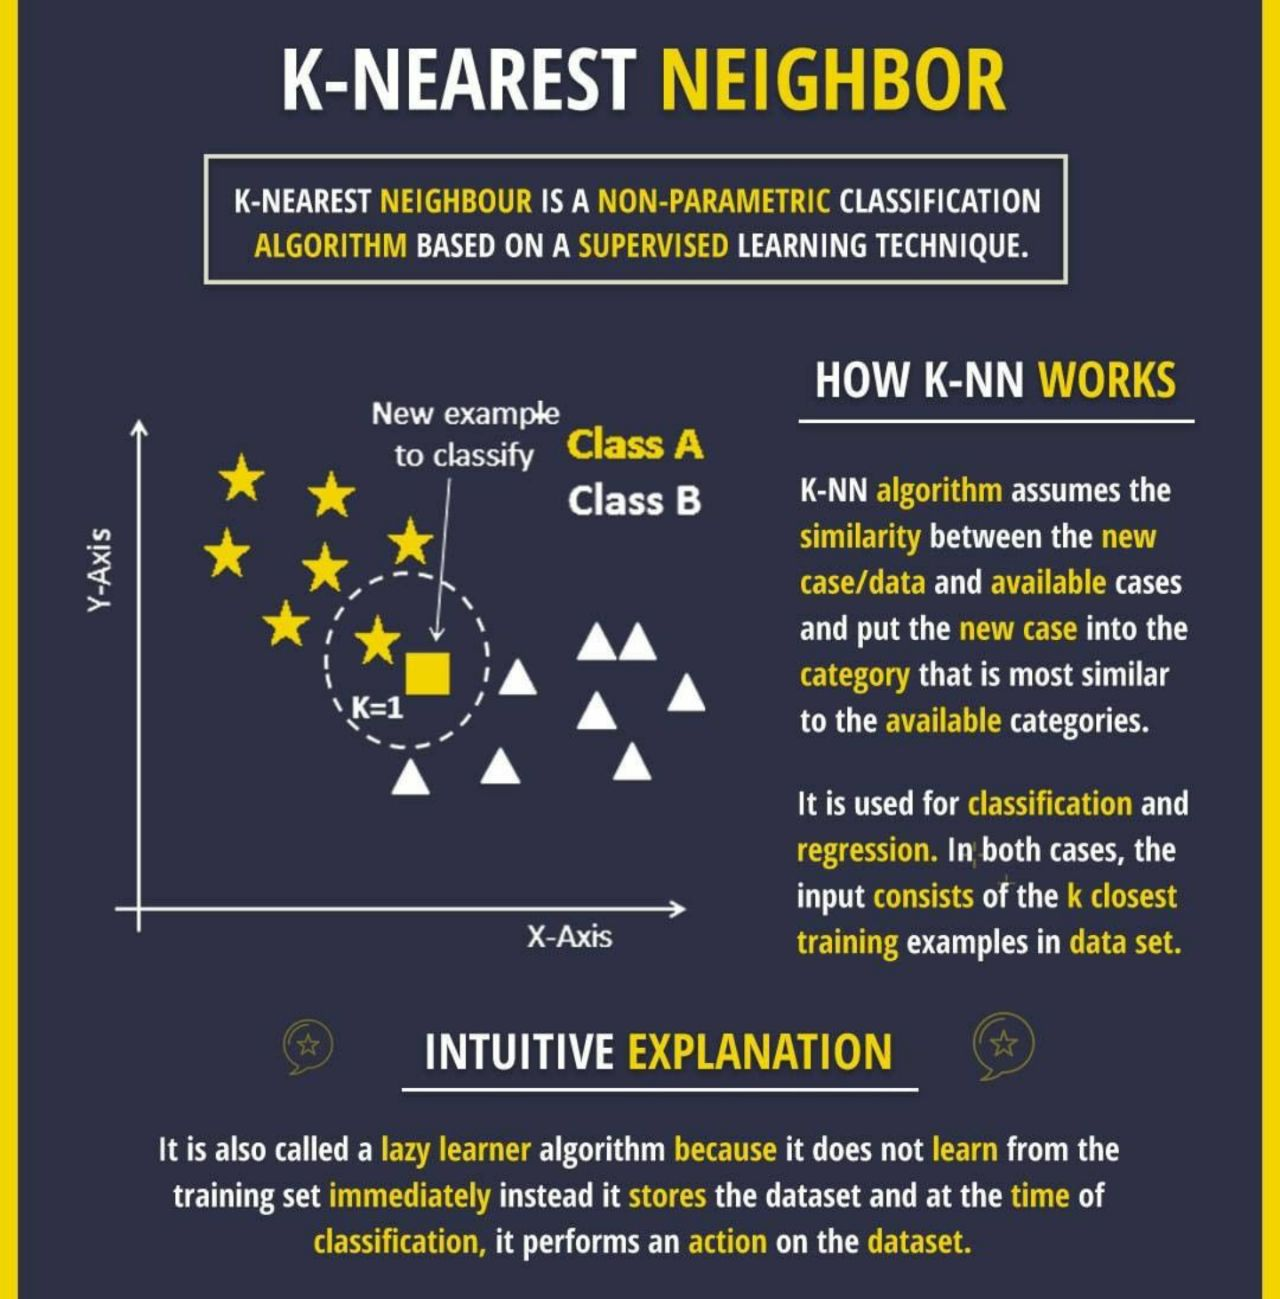

* Lazy learner

  * [Instance Based](https://en.wikipedia.org/wiki/Instance-based_learning)
  * Lazy because it does not try to learn a function from the training data. 
  * It memorise the pattern from the dataset


* [Nonparametric model](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

  * distribution-free tests because no assumption of the data needing to follow a specific distribution
  * [wikipedia](https://en.wikipedia.org/wiki/Nonparametric_statistics)
  * Other examples - Decision Tree, Random Forest



Used for:

* Predict cancer is malignant or benign
* Pattern recognition
* Recommender Systems
* Computer Vision
* Gene Expression
* Protein-Protein Interaction and 3D Structure Prediction


## Disadvantages

* Not efficient on big data
* Curse of dimensionality. Very susceptible to overfitting


## Steps:

* Choose the number of $k$
* Select a distance metric
* Find the k nearest neighbors of the sample
* Assign the class label by majority vote

# Making Predictions with KNN
KNN makes predictions using the training dataset directly.

Predictions are made for a new instance (x) by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances.

To determine which of the K instances in the training dataset are most similar to a new input a distance measure is used.

Metrics intended for real-valued vector spaces:

| identifier	| class name	| args	| distance function |
|:- |:- |:- |:- |
|“euclidean” | 	EuclideanDistance  |   | $\sqrt{\sum(x - y)^2)}$  |  
|“manhattan” | ManhattanDistance |  | $\sum\big|x - y\big|$|  
|“chebyshev” | ChebyshevDistance |  | max${\big|x - y\big|}$ |  
|“minkowski” | MinkowskiDistance	 | p	 | $\sum(\big|x - y\big|^p)^{\frac{1}{p}}$     | 
|“wminkowski” | WMinkowskiDistance	 | p, w	 | $\sum(w\big|x - y\big|^p)^{\frac{1}{p}}$     |
|“seuclidean” | SEuclideanDistance	 | V	 | $\sqrt{\sum\frac{(x - y)^2}{V})}$     | 

# Best Prepare Data for KNN
- **Rescale Data:** KNN performs much better if all of the data has the same scale. Normalizing your data to the range [0, 1] is a good idea. It may also be a good idea to standardize your data if it has a Gaussian distribution.
- **Address Missing Data:** Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed.
- **Lower Dimensionality:** KNN is suited for lower dimensional data. You can try it on high dimensional data (hundreds or thousands of input variables) but be aware that it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

## Get the Data

In [ ]:
data = pd.read_csv("/kaggle/input/college-data/data.csv")
data.columns = data.columns.str.lower()
data.head()

# Exploratory Data Analysis (EDA)

In [ ]:
pd.set_option('display.float_format', '{:.4}'.format)
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [ ]:
data.loc[data.grad_rate > 100]

Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.

In [ ]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

# Train test split

In [ ]:
data.private.value_counts()

# Standardize the Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(['private'], axis=1)
y = data.private

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
evaluate(knn_clf, X_train, X_test, y_train, y_test)

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [ ]:
scores = []

for n in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

**Now create the following plot using the information from your for loop.**

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 40), scores)
plt.ylabel("Accuracy")
plt.xlabel("K nearest neighbors")

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

evaluate(knn_clf, X_train, X_test, y_train, y_test)

# Summary
In this post you discovered the KNN machine learning algorithm. You learned that:

- KNN stores the entire training dataset which it uses as its representation.
- KNN does not learn any model.
- KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.
- There are many distance measures to choose from to match the structure of your input data.
- That it is a good idea to rescale your data, such as using normalization, when using KNN.
- If you have any questions about this post or the KNN algorithm ask in the comments and I will do my best to answer.